In [1]:
from library import *
import utility

In [2]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # get petal length, petal width
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [6]:
X_train_01_subset.shape

(70, 2)

In [20]:
#lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd = LogisticRegressionGD(eta=0.05, n_iter=20, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

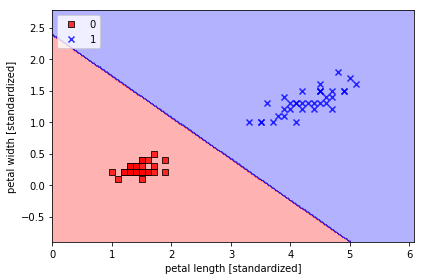

In [21]:
utility.plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()

In [22]:
len(lrgd.cost_)

20

In [26]:
print(lrgd.cost_)

[48.9231990866498, 136.47785858583515, 53.04459292437928, 250.0616600348288, 62.64138911525783, 35.69403447319347, 163.51565590695765, 13.708988195061332, 4.097991124795174, 3.9277273799036534, 3.7893006345026965, 3.6643488593887144, 3.547929882360629, 3.438955109794099, 3.3367104865722794, 3.2405865236848754, 3.1500459372159386, 3.0646126223596655, 2.9838631611000075, 2.907419737815938]


In [23]:
lrgd.w_ # n_iter 1000, array([-12.95468302,   3.56358078,   5.27057764])
# n_iter 200, array([-9.56729488,  2.61545646,  3.93855171])
# n_iter 20, array([-5.93219482,  1.63351382,  2.4865205 ])

array([-5.93219482,  1.63351382,  2.4865205 ])

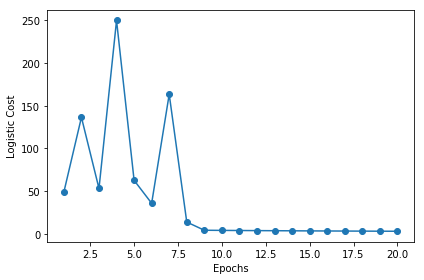

In [24]:
plt.plot(range(1, len(lrgd.cost_) + 1), lrgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Logistic Cost')

plt.tight_layout()
plt.show()

##### why the cost is not zero, it classified all data correctly.

```
logistic cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
y : true output -> 0 or 1
output : predicted output : net_input, apply sigmoid activation 
--> any value between [0 to 1], this is probability. [0,0.1,0.2,0.8,1]
when output=0, incorrect prediction
when output=1, correct prediction

when true y=1, 
cost = -np.log(output) = 0 when output is 1 : correct prediction
                       = inf when output is 0 : incorrect prediction

when true y=0
cost = -np.log(1-output) = inf when output is 1 : incorrect prediction
                         = 0 when output is 0 : correct prediction
```